## Importing necessary libraries.

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [69]:
df= pd.read_csv("baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### All data in integer or float format so no need to change it.

In [71]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [72]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [74]:
df.shape

(30, 17)

#### There is no null or duplicate values.

### EDA

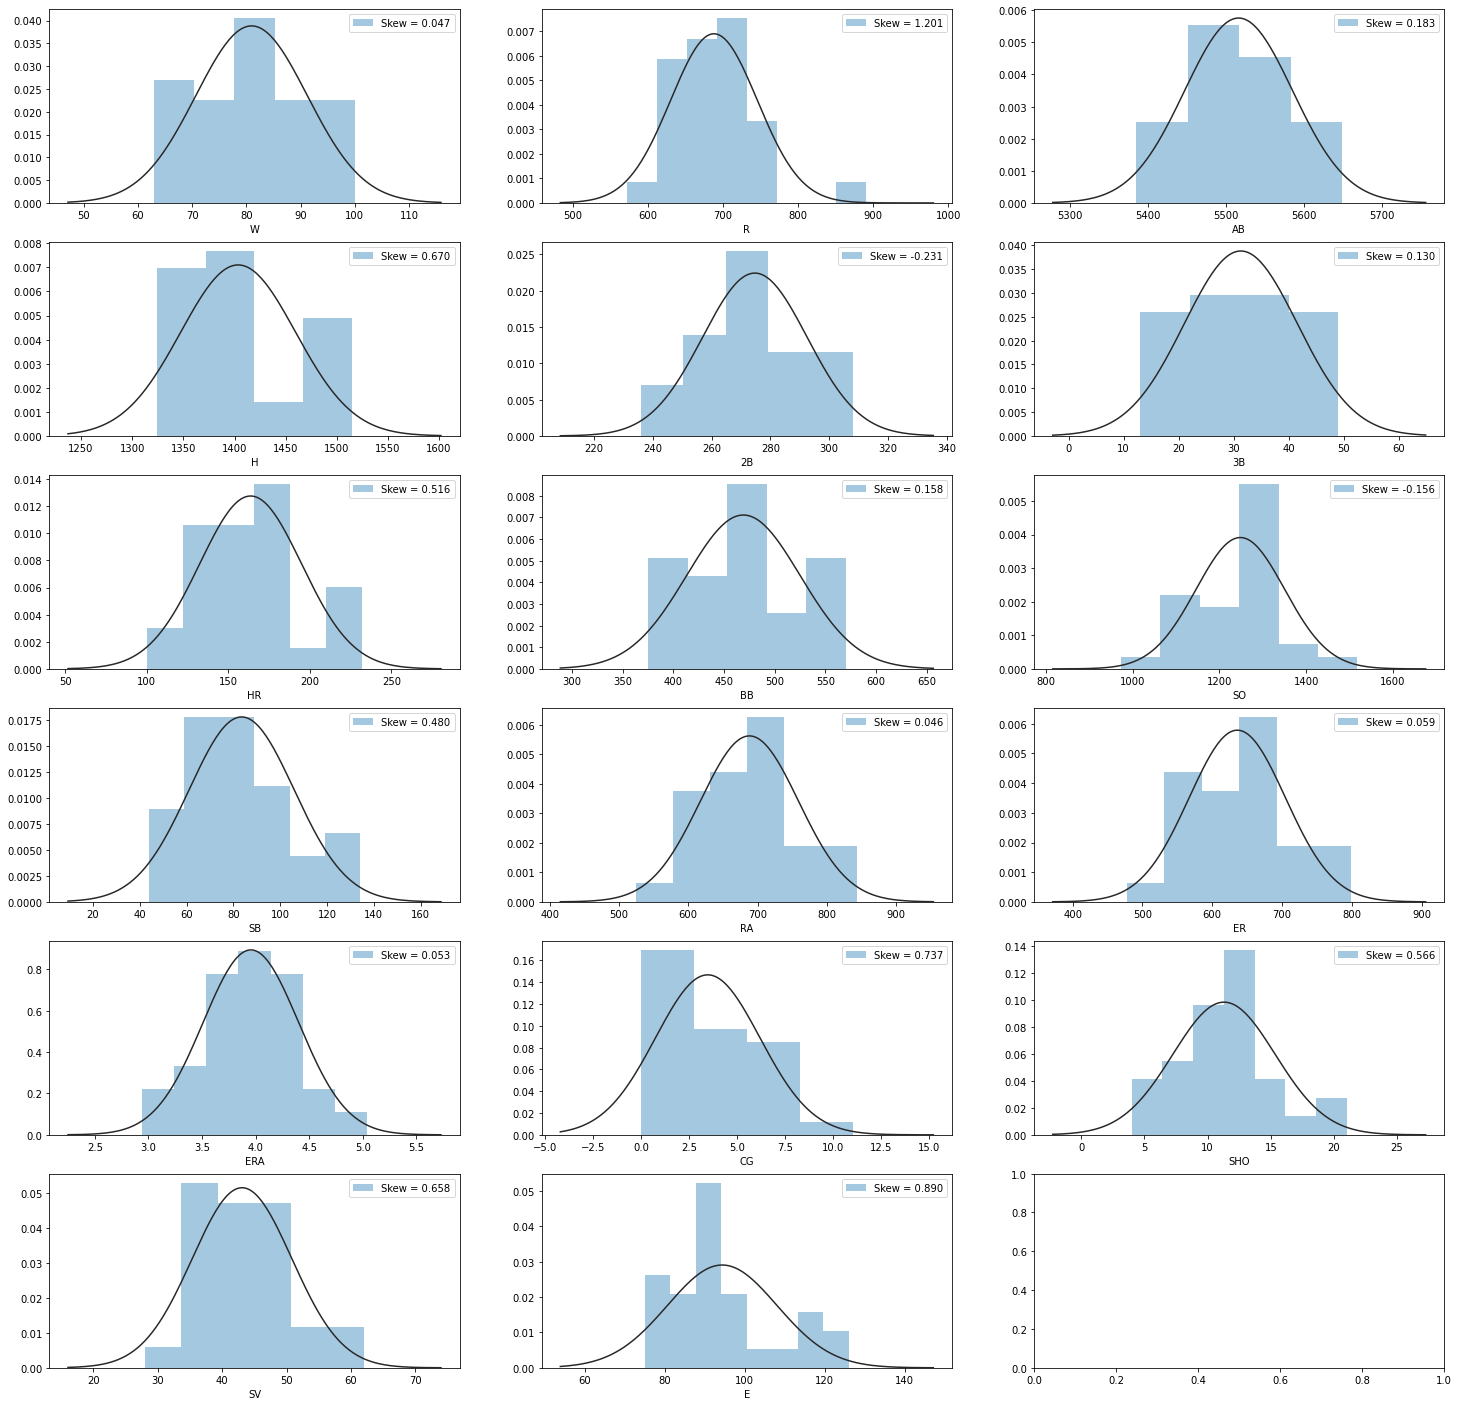

In [75]:
#plotting a histogram of each independent feature for visualization
cols = df.columns
fig,ax = plt.subplots(6,3, figsize=(25, 25))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

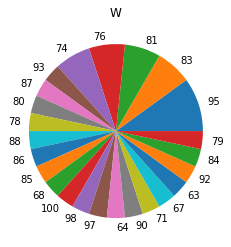

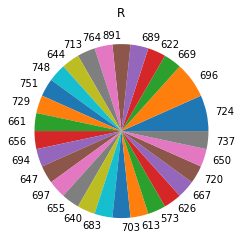

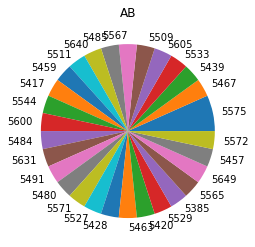

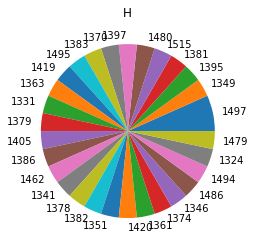

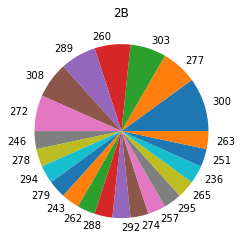

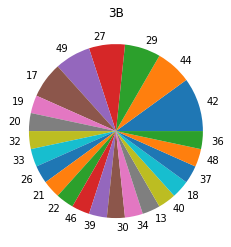

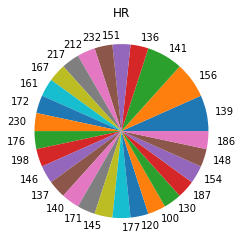

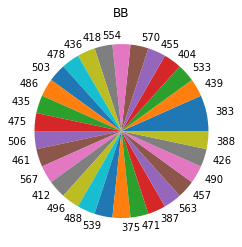

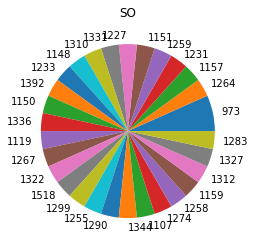

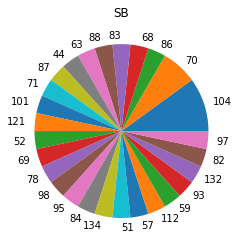

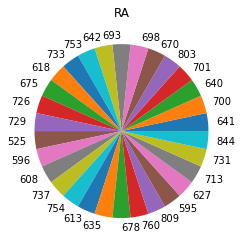

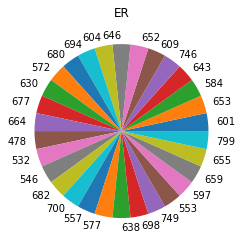

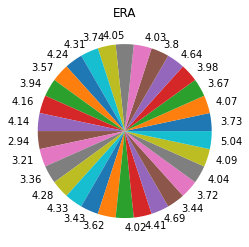

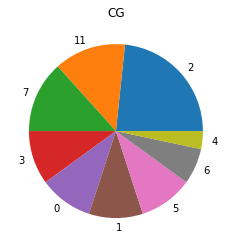

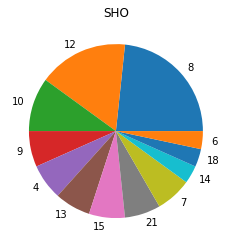

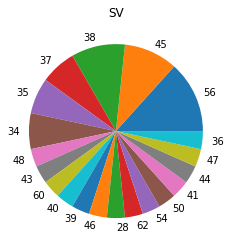

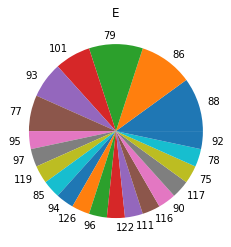

In [76]:
for col in df.columns:
    plt.pie(df[col].value_counts(), labels=df[col].unique())
    plt.title(col)
    plt.show()

<Figure size 1800x1440 with 0 Axes>

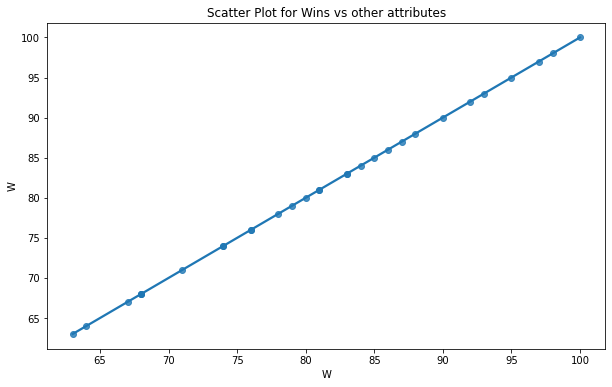

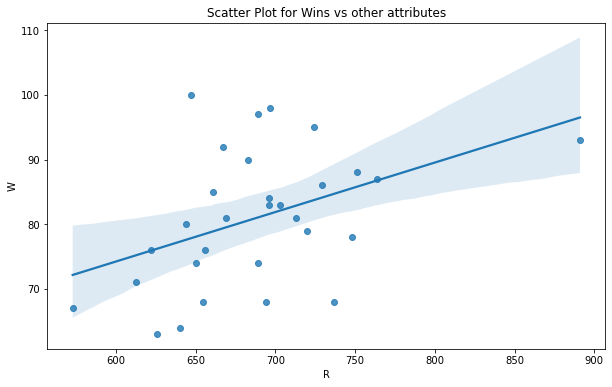

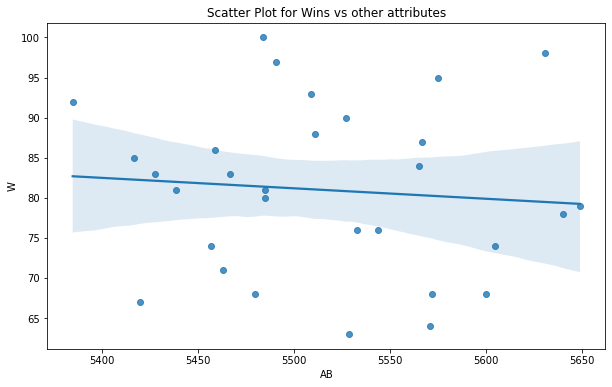

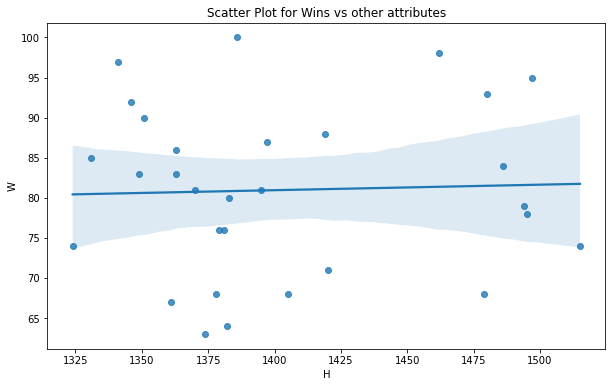

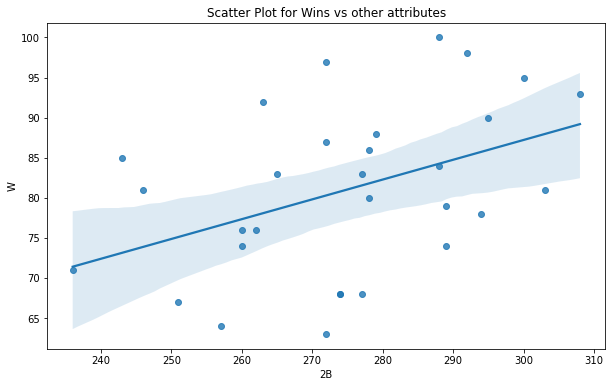

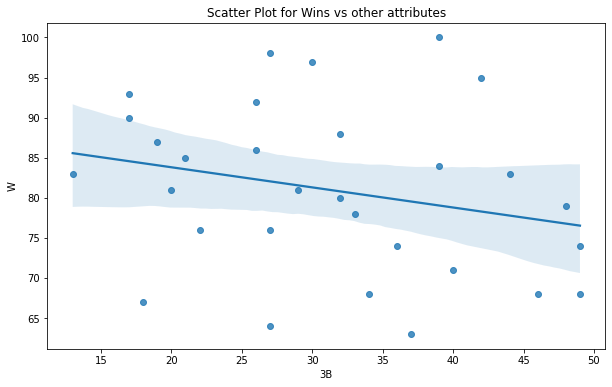

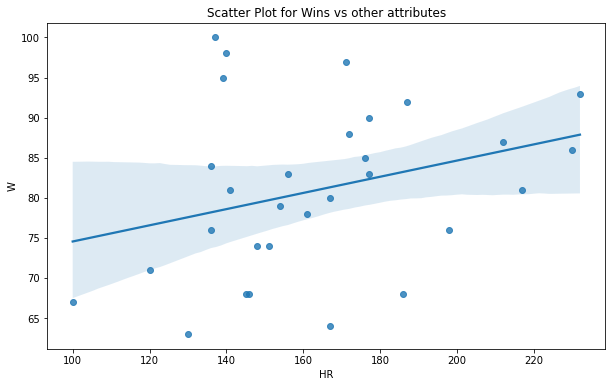

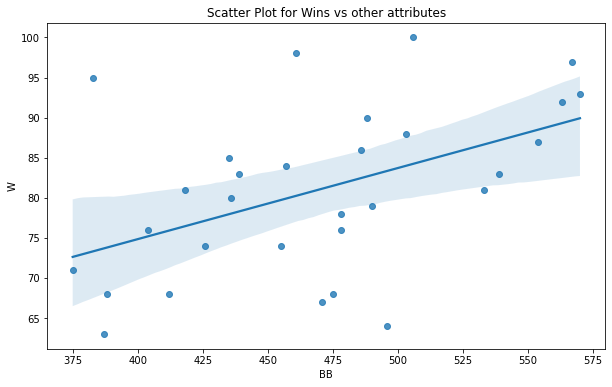

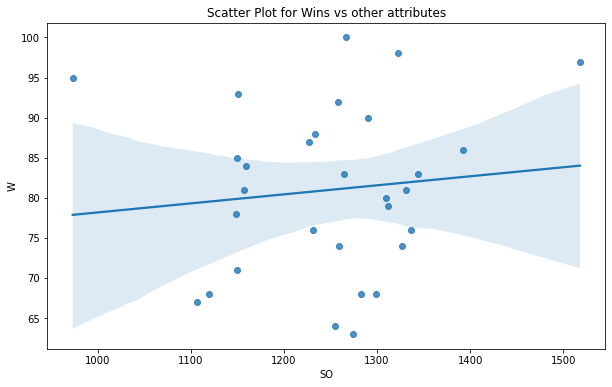

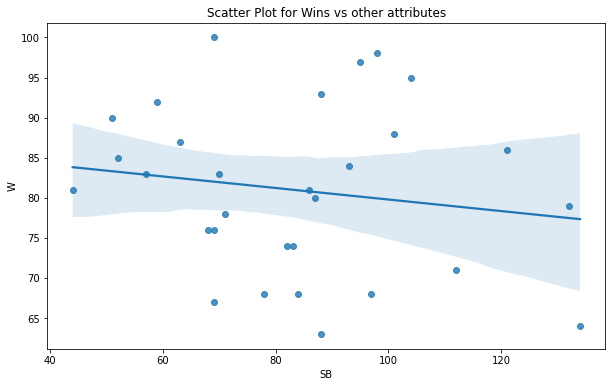

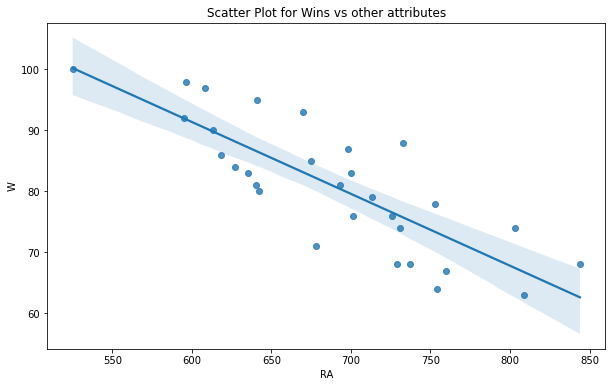

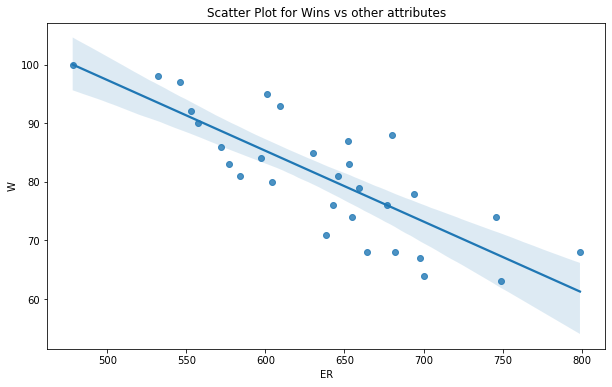

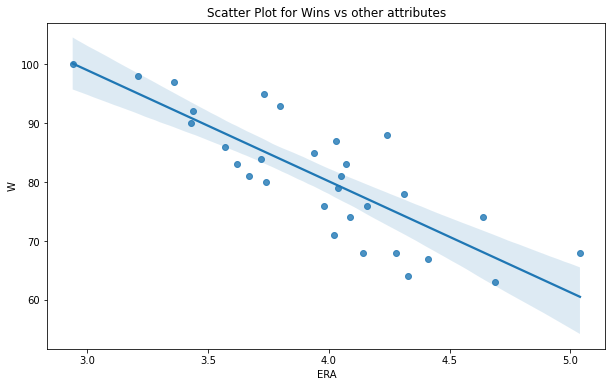

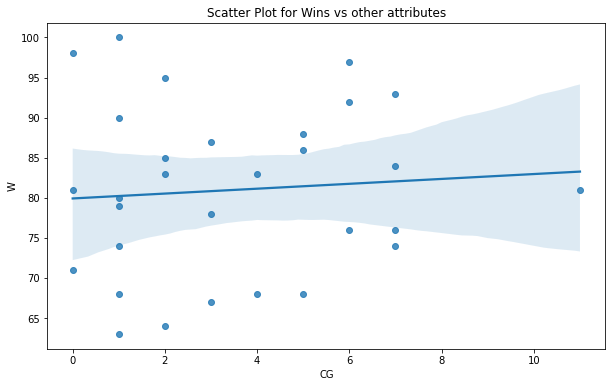

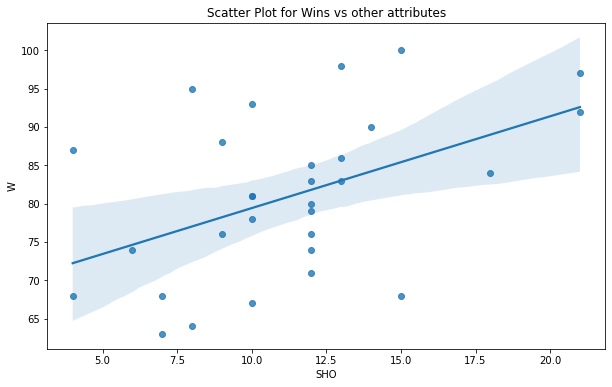

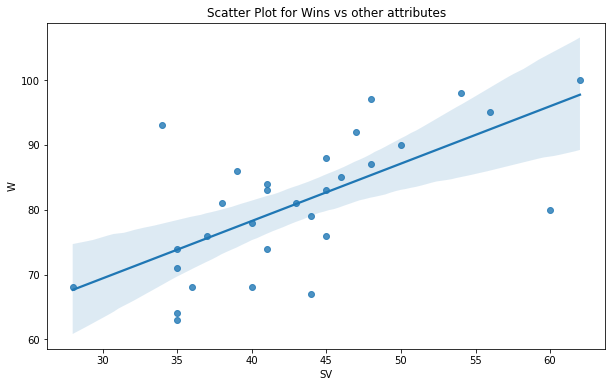

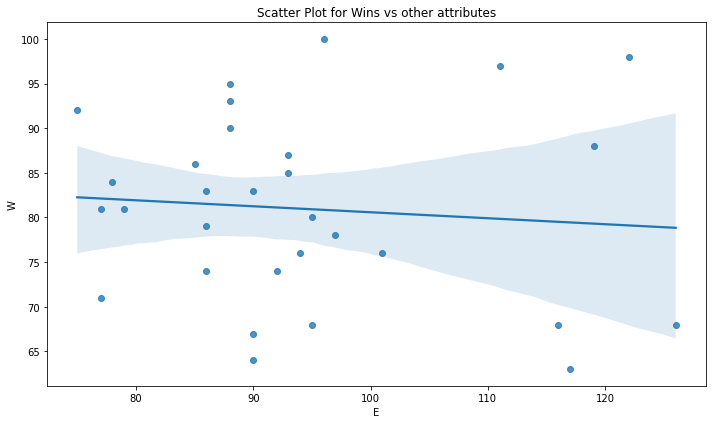

In [77]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

In [78]:
df.isin(['NAN','NA','N/A','-',' ','?',np.nan]).sum().any()

False

In [79]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Removing outliers

In [80]:
z=np.abs(zscore(df))
dfn=df[(z<3).all(axis=1)]
dfn

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [81]:
print("Percentage of loss of data by z score is:",(df.shape[0]-dfn.shape[0])/df.shape[0])


Percentage of loss of data by z score is: 0.03333333333333333


In [82]:
dfn.shape

(29, 17)

In [83]:
#Checking skewness
dfn.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [84]:
# removing skewness

for i in dfn.columns:   
    if abs(dfn[f"{i}"].skew())>=0.5:
        dfn[f"{i}"]=np.log(dfn[f"{i}"])[0]
        print(i,"--",dfn[f"{i}"].skew())

H -- 0
CG -- 0
SHO -- 0
SV -- 0
E -- 0


In [85]:
dfn.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.000000
SHO    0.000000
SV     0.000000
E      0.000000
dtype: float64

### Correlation

<AxesSubplot:>

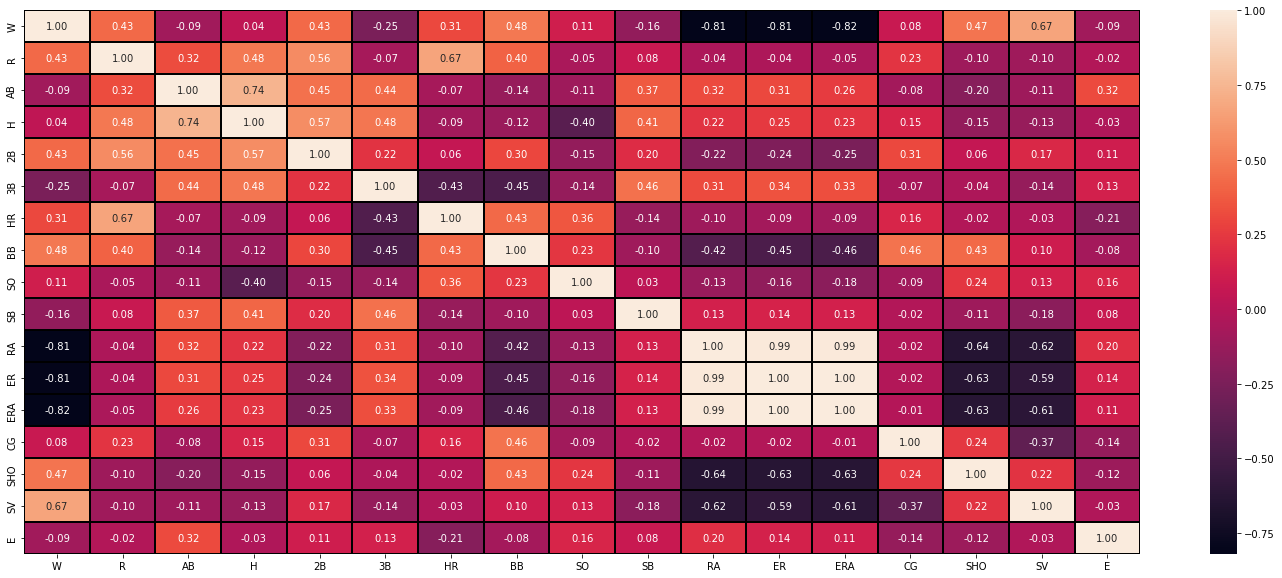

In [104]:
#plotting the heatmap
plt.figure(figsize=(25,10))

sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(dfn.iloc[:,1:].values,i) for i in range(dfn.iloc[:,1:].shape[1])]
vif["features"]=dfn.iloc[:,1:].columns
print(vif)

    VIF Factor features
0     4.969168        R
1     6.884391       AB
2     0.010692        H
3     2.441519       2B
4     2.627635       3B
5     5.690255       HR
6     1.957766       BB
7     2.381755       SO
8     1.480910       SB
9   102.976385       RA
10  914.308865       ER
11  760.234419      ERA
12    0.036730       CG
13    0.015804      SHO
14    0.000000       SV
15    0.000000        E


In [88]:
dfn_1=dfn.drop("ERA", axis=1)

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(dfn_1.iloc[:,1:].values,i) for i in range(dfn_1.iloc[:,1:].shape[1])]
vif["features"]=dfn_1.iloc[:,1:].columns
print(vif)

    VIF Factor features
0     4.076728        R
1     2.176495       AB
2     0.045850        H
3     2.441518       2B
4     2.624316       3B
5     5.278023       HR
6     1.859485       BB
7     2.282378       SO
8     1.478592       SB
9   102.748930       RA
10  109.550948       ER
11    0.011415       CG
12    0.003509      SHO
13    0.000000       SV
14    0.000000        E


### In matter of reduction of multicollinearity, columns with highest VIFs has been removed.

In [90]:
X=dfn_1.iloc[:,1:]
Y=dfn_1.iloc[:,0]
st=StandardScaler()
x=st.fit_transform(X)
Xf=pd.DataFrame(data=x, columns=X.columns)

In [91]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
0,724,5575,7.311218,300,42,139,383,973,104,641,601,0.693147,2.079442,4.025352,4.477337
1,696,5467,7.311218,277,44,156,439,1264,70,700,653,0.693147,2.079442,4.025352,4.477337
2,669,5439,7.311218,303,29,141,533,1157,86,640,584,0.693147,2.079442,4.025352,4.477337
3,622,5533,7.311218,260,27,136,404,1231,68,701,643,0.693147,2.079442,4.025352,4.477337
4,689,5605,7.311218,289,49,151,455,1259,83,803,746,0.693147,2.079442,4.025352,4.477337
6,764,5567,7.311218,272,19,212,554,1227,63,698,652,0.693147,2.079442,4.025352,4.477337
7,713,5485,7.311218,246,20,217,418,1331,44,693,646,0.693147,2.079442,4.025352,4.477337
8,644,5485,7.311218,278,32,167,436,1310,87,642,604,0.693147,2.079442,4.025352,4.477337
9,748,5640,7.311218,294,33,161,478,1148,71,753,694,0.693147,2.079442,4.025352,4.477337
10,751,5511,7.311218,279,32,172,503,1233,101,733,680,0.693147,2.079442,4.025352,4.477337


In [92]:
Y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [93]:
df.iloc[:,0]

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [94]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(Xf,Y,test_size=0.25,random_state=15)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)


(21, 15) (21,)
(8, 15) (8,)


In [95]:
lr=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [96]:
model=[lr,svr,dtr,rfr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    print("==============================================\n\n\n====================================================")

Scores for LinearRegression() are
Mean Absolute Error: 5.888336442111132
Mean Squared Error: 47.54319035857488
Root Mean Squared Error: 6.895157022039084
R squared score:  0.6173586289048298
Cross Validation Score is : [ 0.16548065 -5.1828562   0.19494808 -0.25203122 -4.04057516]
Mean Score : -1.8230067707265865
Difference : -2.4403653996314163


Scores for SVR() are
Mean Absolute Error: 8.431663421130121
Mean Squared Error: 118.93136135293341
Root Mean Squared Error: 10.905565613618277
R squared score:  0.0428059448456064
Cross Validation Score is : [-0.52326287 -0.44233323  0.11844203  0.08397345  0.04229365]
Mean Score : -0.14417739555043363
Difference : -0.18698334039604003


Scores for DecisionTreeRegressor() are
Mean Absolute Error: 8.125
Mean Squared Error: 77.375
Root Mean Squared Error: 8.796306042879591
R squared score:  0.3772635814889336
Cross Validation Score is : [-1.17504333 -1.58823529 -0.76974565  0.66837448 -1.28358209]
Mean Score : -0.8296463768953786
Difference : -1

In [97]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(train_x,train_y)
print(Z.best_params_)

{'alpha': 1, 'random_state': 0}


In [98]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(train_x,train_y)
pred=ls.predict(test_x)
print('R2_score:',r2_score(test_y,pred))
print('mse:',metrics.mean_squared_error(test_y,pred))
print('mae:',metrics.mean_absolute_error(test_y,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(test_y,pred)))

R2_score: 0.774046123650632
mse: 28.074769136408978
mae: 4.341734711979527
rmse: 5.298562931249282


### Hyper parameter tuning

In [99]:
parameter = {'alpha':[0.01,0.1,1.0,10.26],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool'],
            'random_state':list(range(0,100))}

In [100]:
GVC=GridSearchCV(Lasso(),parameter,cv=5)
GVC.fit(train_x,train_y)

GVC.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 2,
 'random_state': 38,
 'selection': 'random',
 'tol': 100}

In [105]:
Final_model=Lasso(alpha=1, fit_intercept="bool", max_iter=2, selection="random", tol=100,random_state=38)
Final_model.fit(train_x,train_y)
pred=Final_model.predict(test_x)
print('R2_Score:',r2_score(test_y,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(test_y,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(test_y,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(test_y,pred)))

R2_Score: 78.96224920999188
mean_squared_error: 26.139405356585083
mean_absolute_error: 4.115043461425163
RMSE value: 5.112671058906987


### Save

In [106]:
import joblib
joblib.dump(Final_model,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

### Predictions

In [107]:
model=joblib.load("BaseballCaseStudy.pkl")


prediction = model.predict(test_x)
prediction

array([87.94535027, 94.65335787, 81.83436187, 73.73201171, 89.68521672,
       70.2603374 , 81.03469408, 87.87627908])

In [108]:
# Creating a function to rounding off the predicted data of wins to nearby integer
def rounding(x):
    A=[]
    for i in x:
        A.append(round(i))
    return A

In [109]:
result=pd.DataFrame([model.predict(test_x)[:],rounding(model.predict(test_x)[:]),test_y[:]],index=["Predicted","Rounded","Original"])
result

,0,1,2,3,4,5,6,7
Predicted,87.94535,94.653358,81.834362,73.732012,89.685217,70.260337,81.034694,87.876279
Rounded,88.00000,95.000000,82.000000,74.000000,90.000000,70.000000,81.000000,88.000000
Original,97.00000,100.000000,79.000000,74.000000,90.000000,64.000000,83.000000,81.000000
